# sales data analysis
##### **for an imaginary company**

required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

add all 12 months files into one csv

In [2]:
all_files = [file for file in os.listdir('./sales-dataset')]

all_months = pd.DataFrame()

for file in all_files:
    df = pd.read_csv('./sales-dataset/'+file)
    all_months = pd.concat([all_months, df])

all_months.to_csv('sales_2019.csv', index= False)

an overview of the csv file

In [3]:
sales_2019 = pd.read_csv('sales_2019.csv')
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11646 non-null  object
 1   Product           11646 non-null  object
 2   Quantity Ordered  11646 non-null  object
 3   Price Each        11646 non-null  object
 4   Order Date        11646 non-null  object
 5   Purchase Address  11646 non-null  object
dtypes: object(6)
memory usage: 547.9+ KB


In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,11646,11646,11646,11646,11646,11646
unique,11208,20,7,24,9495,11032
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,17,1454,10490,1454,17,17


##### **data cleaning**

delete NaN records

In [6]:
nan_df = sales_2019[sales_2019.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sales_2019 = sales_2019.dropna(how='all')
sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


delete 'or' from "Order Date" column

In [8]:
sales_2019 = sales_2019[sales_2019['Order Date'].str[0:2] != 'Or']

##### **convert data types of columns**

order ID

In [9]:
sales_2019 = sales_2019.copy() # this line is for stop warnings related to modifying a slice of a DataFrame

sales_2019['Order ID'] = sales_2019['Order ID'].astype('int32')

order date

In [10]:
sales_2019['Order Date'] = pd.to_datetime(sales_2019['Order Date'], format='%m/%d/%y %H:%M')

sales_2019.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215"


quantity ordered

In [11]:
sales_2019['Quantity Ordered'] = sales_2019['Quantity Ordered'].astype('int32')

price each

In [12]:
sales_2019['Price Each'] = pd.to_numeric(sales_2019['Price Each'])

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


new data types

In [13]:
sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


##### **best month for sales?**

add a column for month of order

In [14]:
sales_2019 = sales_2019.copy() # this line is for stop warnings related to modifying a slice of a DataFrame

In [15]:
sales_2019['Month'] = sales_2019['Order Date'].dt.strftime('%B')

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September


add a new column for sales (quantity ordered * price each)

In [16]:
sales_2019['Sales'] =  sales_2019['Quantity Ordered'] * sales_2019['Price Each']

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97
186845,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00
186846,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00
186847,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99


reorder month and sales columns

In [17]:
cols = list(sales_2019.columns)

cols.insert(5, cols.pop(cols.index('Month')))

cols.insert(4, cols.pop(cols.index('Sales')))

sales_2019 = sales_2019[cols]

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,April,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,September,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,September,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,September,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,September,"511 Forest St, San Francisco, CA 94016"


display each month sales

In [18]:
final = sales_2019.groupby('Month')['Sales'].sum().sort_values()

final

Month
January      1822256.73
September    2097560.13
February     2202022.42
August       2244467.88
June         2577802.26
July         2647775.76
March        2807100.38
May          3152606.75
November     3199603.20
April        3390670.24
October      3736726.88
December     4613443.34
Name: Sales, dtype: float64

result in bar-plot

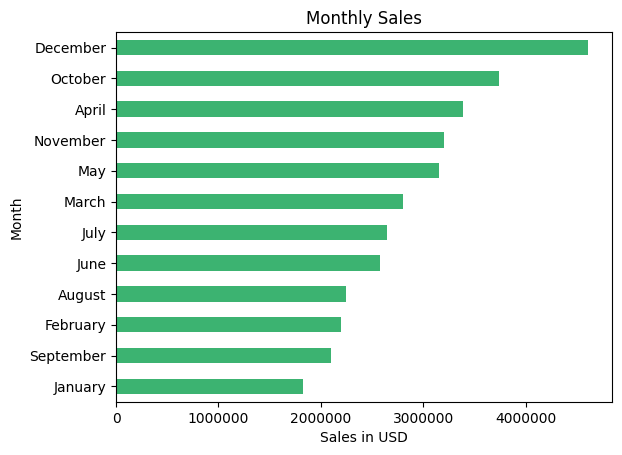

In [19]:
final.plot(kind='barh', color='mediumseagreen')
plt.title('Monthly Sales')
plt.xlabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='x')  # disables scientific notation of sales nums

##### **which city has the most number of sales**

add a city column

In [20]:
sales_2019 = sales_2019.copy() # this line is for stop warnings related to modifying a slice of a DataFrame

sales_2019['City'] = sales_2019['Purchase Address'].apply(
    lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].split()[0]})"
)

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,April,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,September,"840 Highland St, Los Angeles, CA 90001",Los Angeles (CA)
186845,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,September,"216 Dogwood St, San Francisco, CA 94016",San Francisco (CA)
186846,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,September,"220 12th St, San Francisco, CA 94016",San Francisco (CA)
186847,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,September,"511 Forest St, San Francisco, CA 94016",San Francisco (CA)


show each city sales

In [21]:
city_sales = sales_2019.groupby('City')['Sales'].sum().sort_values()

city_sales

City
Portland (ME)          449758.27
Austin (TX)           1819581.75
Portland (OR)         1870732.34
Seattle (WA)          2747755.48
Dallas (TX)           2767975.40
Atlanta (GA)          2795498.58
Boston (MA)           3661642.01
New York City (NY)    4664317.43
Los Angeles (CA)      5452570.80
San Francisco (CA)    8262203.91
Name: Sales, dtype: float64

result in bar-plot

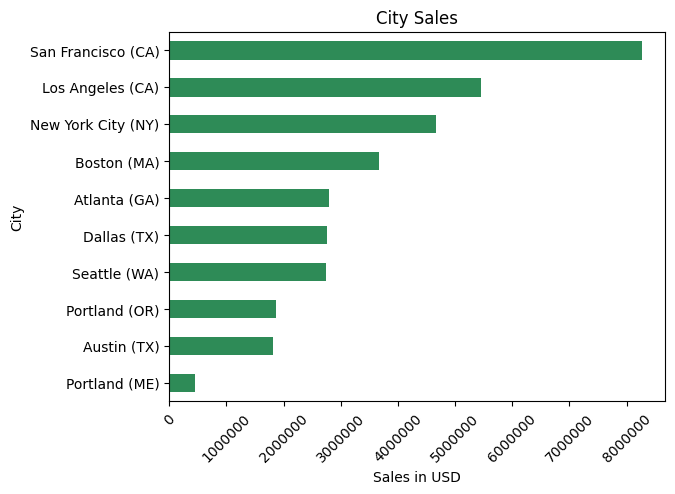

In [22]:
city_sales.plot(kind='barh', color='seagreen')
plt.title('City Sales')
plt.xlabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='x')  # disables scientific notation of sales nums
plt.xticks(rotation=45);   #  this semicolon hides the output

##### **When should we display ads to increase the chance of customers buying the product?**

add hour column

In [23]:
sales_2019['Hour'] = sales_2019['Order Date'].dt.hour

reorder those two columns

In [24]:
new_order = [0, 1, 2, 3, 4, 5, 9, 6, 7, 8]
sales_2019 = sales_2019.iloc[:, new_order]

sales_2019

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,April,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,April,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,April,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,20,September,"840 Highland St, Los Angeles, CA 90001",Los Angeles (CA)
186845,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,16,September,"216 Dogwood St, San Francisco, CA 94016",San Francisco (CA)
186846,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,7,September,"220 12th St, San Francisco, CA 94016",San Francisco (CA)
186847,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,17,September,"511 Forest St, San Francisco, CA 94016",San Francisco (CA)


display each hour sales from low to high

In [25]:
sales_time_sorted = sales_2019.groupby('Hour')['Sales'].sum().sort_values()

sales_time_sorted

Hour
3      145757.89
4      162661.01
5      230679.82
2      234851.44
6      448113.00
1      460866.88
0      713721.27
7      744854.12
23    1179304.44
8     1192348.97
22    1607549.21
9     1639030.58
16    1904601.31
15    1941549.60
10    1944286.77
21    2042000.86
14    2083672.73
17    2129361.61
13    2155389.80
18    2219348.30
20    2281716.24
11    2300610.24
12    2316821.34
19    2412938.54
Name: Sales, dtype: float64

result in a barh-plot

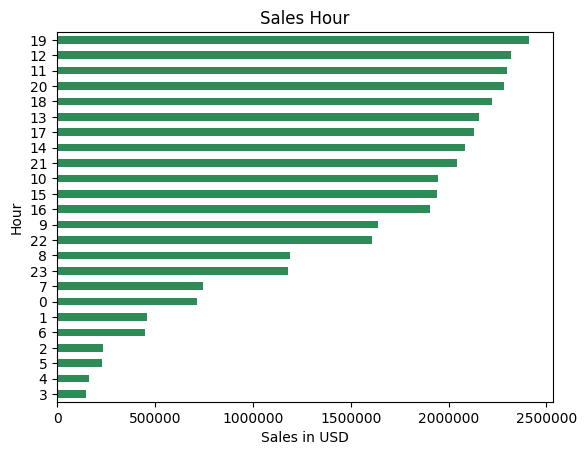

In [26]:
sales_time_sorted.plot(kind='barh', color='seagreen')
plt.title('Sales Hour')
plt.xlabel('Sales in USD')
plt.ticklabel_format(style='plain', axis='x')  # disables scientific notation of sales nums

result in a line-plot

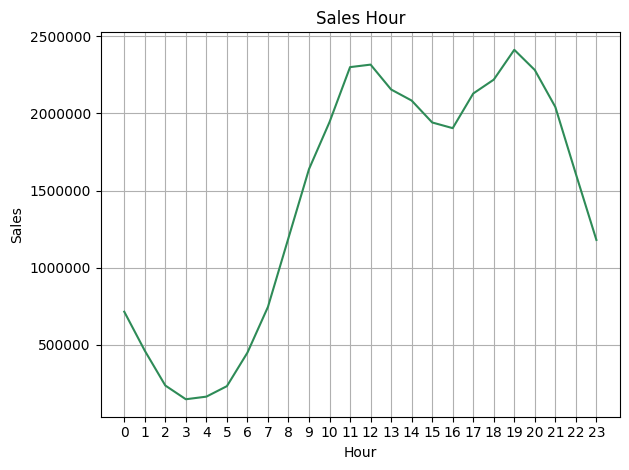

In [27]:
sales_time = sales_2019.groupby('Hour')['Sales'].sum()

sales_time.plot(kind='line', color='seagreen')
plt.title('Sales Hour')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.ticklabel_format(style='plain', axis='y')  # disables scientific notation of sales nums
plt.xticks(ticks=range(24))
plt.grid(True)
plt.tight_layout()

shows each hour orders

In [30]:
orders_per_hour = sales_2019.groupby('Hour')['Order ID'].count().sort_index()

orders_per_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

result in line-plot

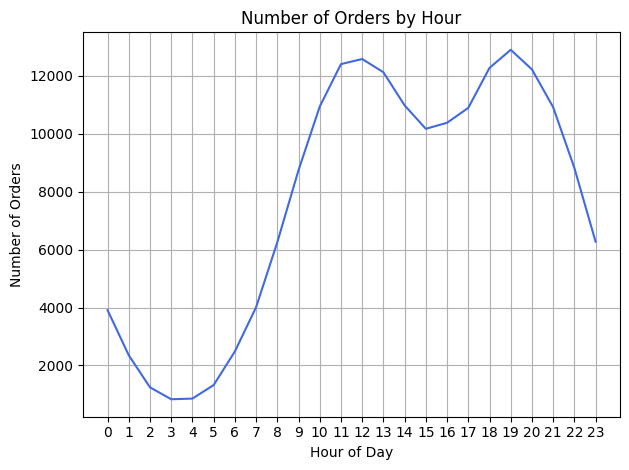

In [ ]:
orders_per_hour.plot(kind='line', color='royalblue')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(24)) 
plt.grid(True)
plt.tight_layout()
plt.show()

##### **which products are most likely to be bought together?**

find duplicate order IDs

In [33]:
dups = sales_2019[sales_2019['Order ID'].duplicated(keep=False)]

dups

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,April,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
17,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,19,April,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA)
18,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,19,April,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA)
29,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,11,April,"823 Highland St, Boston, MA 02215",Boston (MA)
...,...,...,...,...,...,...,...,...,...,...
186791,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,20,September,"106 7th St, Atlanta, GA 30301",Atlanta (GA)
186802,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,0,September,"241 Highland St, Atlanta, GA 30301",Atlanta (GA)
186803,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,0,September,"241 Highland St, Atlanta, GA 30301",Atlanta (GA)
186840,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,13,September,"519 Maple St, San Francisco, CA 94016",San Francisco (CA)


group products per order

In [36]:
dups.loc[:, 'Grouped'] = dups.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

drop duplicates so we have one row per order

In [37]:
dups = dups[['Order ID', 'Grouped']].drop_duplicates()

count most common product pairs

In [38]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in dups['Grouped']:
    product_list = products.split(',')
    combos = combinations(product_list, 2)
    count.update(combos)

# show top 10 most common pairs
for pair, freq in count.most_common(10):
    print(f"{pair}: {freq} times")

('iPhone', 'Lightning Charging Cable'): 1005 times
('Google Phone', 'USB-C Charging Cable'): 987 times
('iPhone', 'Wired Headphones'): 447 times
('Google Phone', 'Wired Headphones'): 414 times
('Vareebadd Phone', 'USB-C Charging Cable'): 361 times
('iPhone', 'Apple Airpods Headphones'): 360 times
('Google Phone', 'Bose SoundSport Headphones'): 220 times
('USB-C Charging Cable', 'Wired Headphones'): 160 times
('Vareebadd Phone', 'Wired Headphones'): 143 times
('Lightning Charging Cable', 'Wired Headphones'): 92 times


result in barh-plot

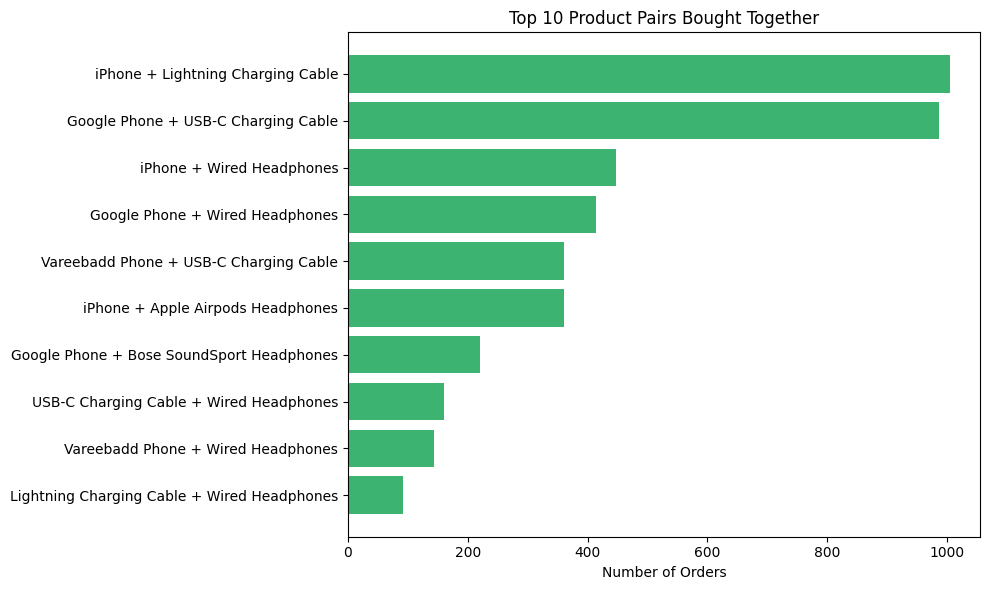

In [ ]:
common_pairs = count.most_common(10)

# separate pairs and their counts
pairs = [f"{a} + {b}" for (a, b), _ in common_pairs]
counts = [count for _, count in common_pairs]

plt.figure(figsize=(10, 6))
plt.barh(pairs, counts, color='mediumseagreen')
plt.xlabel('Number of Orders')
plt.title('Top 10 Product Pairs Bought Together')
plt.gca().invert_yaxis()  # high to low
plt.tight_layout()
plt.show()


##### **what product sold the most? what was the reason?**

group products and sum the quantity of them

In [50]:
product_group = sales_2019.groupby('Product')

product_summary = product_group[['Quantity Ordered']].sum()

product_summary

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


show result in a barh-plot for first part of the question

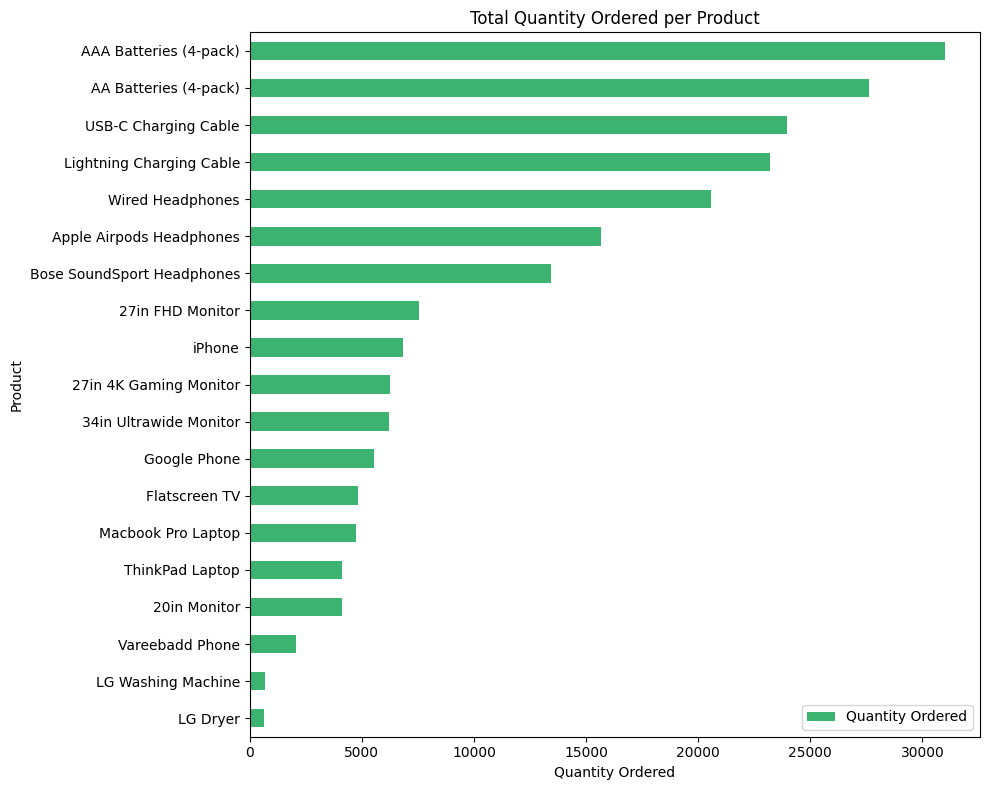

In [56]:
product_summary_sorted = product_summary.sort_values('Quantity Ordered')

product_summary_sorted.plot(kind='barh', figsize=(10, 8), color='mediumseagreen')
plt.title('Total Quantity Ordered per Product')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

for second part of the question we can guess this order was because of price of each item.
so now we should proof if there are correlation between them or not

In [60]:
product_group = sales_2019.groupby('Product')

product_price = product_group[['Price Each']].mean().sort_values('Price Each')

product_price

,Price Each
Product,
AAA Batteries (4-pack),2.99
AA Batteries (4-pack),3.84
USB-C Charging Cable,11.95
Wired Headphones,11.99
Lightning Charging Cable,14.95
Bose SoundSport Headphones,99.99
20in Monitor,109.99
27in FHD Monitor,149.99
Apple Airpods Headphones,150.00


C:\Users\Emad\AppData\Local\Temp\ipykernel_16988\503636398.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sorted_products.index, rotation=90)


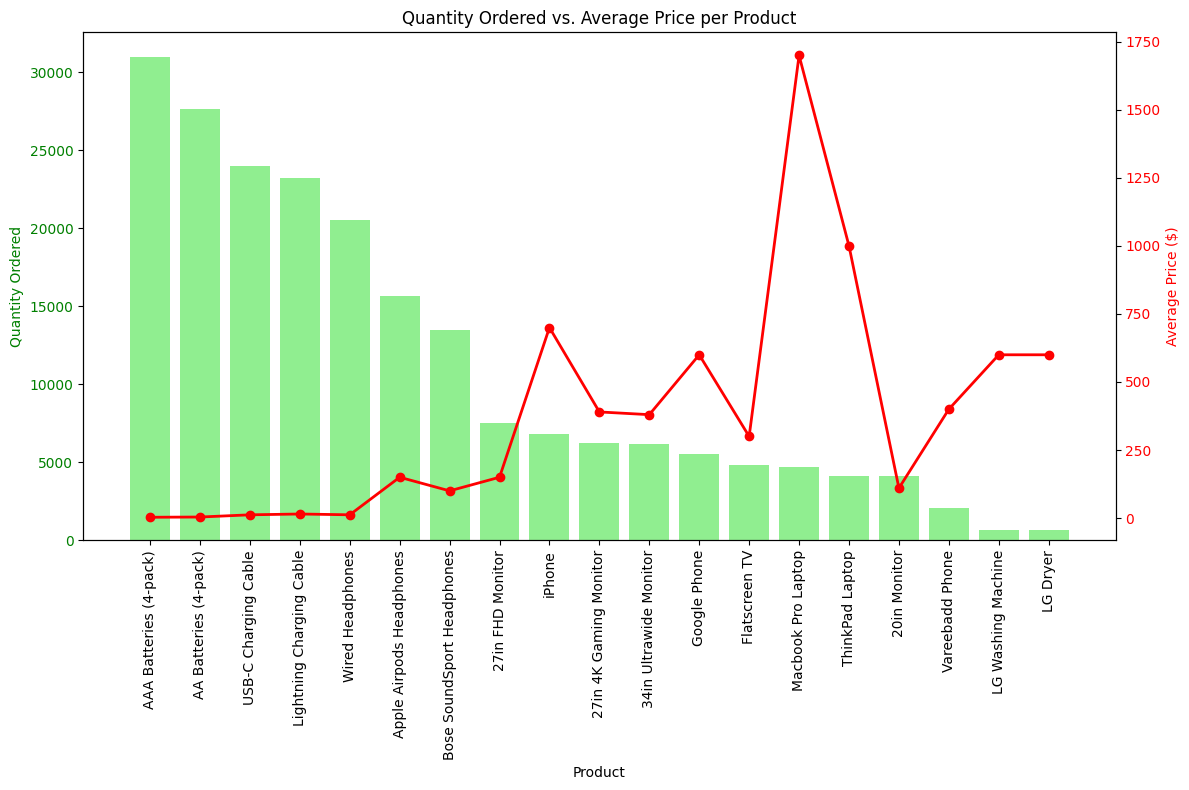

In [ ]:

product_group = sales_2019.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
average_price = product_group['Price Each'].mean()

sorted_products = quantity_ordered.sort_values(ascending=False)
average_price = average_price[sorted_products.index]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(sorted_products.index, sorted_products.values, color='lightgreen')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(sorted_products.index, rotation=90)

ax2 = ax1.twinx()
ax2.plot(sorted_products.index, average_price.values, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Quantity Ordered vs. Average Price per Product')
plt.tight_layout()
plt.show()


so with a few exceptions we can say that the price of each product are correlated with that product orders